## Capstone Project
## The Battle of Neighborhoods

## Staten Island, New York City Analysis

### Table of contents

* [Introduction: Business Problem](#introduction)
* [Data Description](#data)
* [NYC Crime Analysis](#Stage0)
* [Why Staten Island](#Stage1)
* [Staten Island Crime Analysis](#Stage2)
* [Staten Island Real Estate Analysis](#Stage3)
* [Staten Island Most Expensive Neighborhoods](#Stage4)
* [Staten Island Least Expensive Neighborhoods](#Stage5)
* [Staten Island Schools Analysis](#Stage6)
* [Staten Island Hospitals Analysis](#Stage7)
* [Staten Island Neighborhoods Analysis](#Stage8)
* [Staten Island Neighborhood Venues](#Stage9)
* [Machine Learning Model](#Stage10)
* [Cluster Analysis](#Stage11)
* [Results/Discussion](#Stage12)
* [Conclusion](#Stage13)
* [References](#Stage14)

### Intorduction: Business Problem <a name="introduction"></a>

In this Project, Our main focus will be to provide qulaity information about NewYork City and one of its main borough Staten Island. The <b>crime rate, real estate prices, schools, hospitals and nearby venues</b> will be analysed to provide users with the information as to where should they settle down.

The complete detailed introduction and business problem for this project has been provided in the Business Problem File submitted seperately and can also be found in the Github repo for this project.

### Data Description <a name="data"></a>
The following Datasets will be used for this project:

1. NYPD Arrest Data dataset
2. Real Estate dataset
3. USA Hospitals dataset 
4. USA Hospitals Ratings and Features dataset
5. USA Public Schools dataset
6. Staten Island Neighborhoods from Wikipedia
7. Foursquare API

The details and links for all of these datasets has been provided in the Data Description File submitted seperately and can also be found in the Github repo for this project.

### Import & Download Required Libraries & Dependencies

In [209]:
!pip install geocoder
!pip install folium
!pip install geopy

In [210]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
import xml
import requests
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import geocoder
import folium
import statistics 
#import geopy

## NewYork City Crime Analysis <a name="Stage0"></a>

The NYPD Arrest Data dataset available on CityOfNewyork Website will be used here to gather the data about every recored Crime that occured in the year 2020.

#### Read New York Crime Data CSV file


In [211]:
crimeDF = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")
crimeDF.shape

(140413, 19)

In [212]:
crimeDF.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222243929,12/25/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,40,0,25-44,M,BLACK,1007453,233952,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
1,222115778,12/22/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,33,0,18-24,M,BLACK HISPANIC,1001456,247485,40.845956,-73.937813,POINT (-73.93781267199995 40.84595574000008)
2,222090516,12/21/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,0,25-44,M,BLACK,1028605,187930,40.682398,-73.840079,POINT (-73.84007936899997 40.68239828900005)
3,221653577,12/10/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,103,0,18-24,M,BLACK,1039602,190480,40.689335,-73.800409,POINT (-73.80040882999998 40.68933550400004)
4,221599602,12/9/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,S,120,0,18-24,M,BLACK,949767,170539,40.634708,-74.124241,POINT (-74.12424111699994 40.634707811000055)


#### Modify Crime Dataframe
The Dataset will be futhur Cleaned to get only the columns that are needed for this project.For example, arrest date, location and gender of the criminal

In [213]:
crimeDF1 = crimeDF[['ARREST_DATE','ARREST_BORO','AGE_GROUP','PERP_SEX','PERP_RACE','OFNS_DESC','Latitude','Longitude']]
crimeDF1.shape

(140413, 8)

In [214]:
crimeDF1.head()

,ARREST_DATE,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,OFNS_DESC,Latitude,Longitude
0,12/25/2020,B,25-44,M,BLACK,FELONY ASSAULT,40.808798,-73.916184
1,12/22/2020,M,18-24,M,BLACK HISPANIC,ROBBERY,40.845956,-73.937813
2,12/21/2020,Q,25-44,M,BLACK,FELONY ASSAULT,40.682398,-73.840079
3,12/10/2020,Q,18-24,M,BLACK,FELONY ASSAULT,40.689335,-73.800409
4,12/9/2020,S,18-24,M,BLACK,FORGERY,40.634708,-74.124241


#### Change Column Names
The column names for the dataframe will be edited to better understand and making them easier to use

In [215]:
crimeDF1.columns = ['Arrest_Date','Borough','Age_Group','Criminal_Sex','Criminal_Race','Crime_Category','Latitude','Longitude']
crimeDF1

,Arrest_Date,Borough,Age_Group,Criminal_Sex,Criminal_Race,Crime_Category,Latitude,Longitude
0,12/25/2020,B,25-44,M,BLACK,FELONY ASSAULT,40.808798,-73.916184
1,12/22/2020,M,18-24,M,BLACK HISPANIC,ROBBERY,40.845956,-73.937813
2,12/21/2020,Q,25-44,M,BLACK,FELONY ASSAULT,40.682398,-73.840079
3,12/10/2020,Q,18-24,M,BLACK,FELONY ASSAULT,40.689335,-73.800409
4,12/9/2020,S,18-24,M,BLACK,FORGERY,40.634708,-74.124241
...,...,...,...,...,...,...,...,...
140408,1/7/2020,K,18-24,M,BLACK,DANGEROUS WEAPONS,40.688783,-73.947893
140409,1/4/2020,Q,25-44,M,WHITE,DANGEROUS DRUGS,40.700591,-73.807743
140410,1/11/2020,S,18-24,M,WHITE HISPANIC,FRAUDS,40.638126,-74.087467
140411,1/8/2020,K,25-44,M,WHITE HISPANIC,DANGEROUS WEAPONS,40.682289,-73.985233


In [216]:
crimeDF1['Crime_Category'].value_counts()

ASSAULT 3 & RELATED OFFENSES       23731
FELONY ASSAULT                     13475
PETIT LARCENY                      11406
DANGEROUS DRUGS                    11289
MISCELLANEOUS PENAL LAW             9133
                                   ...  
ESCAPE 3                               4
KIDNAPPING                             3
NEW YORK CITY HEALTH CODE              1
ADMINISTRATIVE CODES                   1
KIDNAPPING AND RELATED OFFENSES        1
Name: Crime_Category, Length: 61, dtype: int64

In [217]:
dataBorough = (crimeDF1['Borough'].value_counts())
dataBorough

K    38258
M    33255
B    32724
Q    29981
S     6195
Name: Borough, dtype: int64

#### Plot NYC Arrest Record in Every Neighborhood
Matplotlib will be used to plot the recorded crimes that occured in 2020 

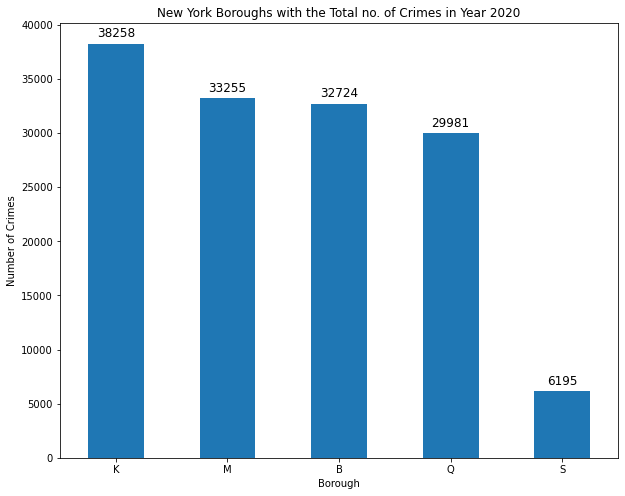

In [218]:
crmPlot = dataBorough

ax = crmPlot.plot(kind='bar', figsize=(10, 8), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('New York Boroughs with the Total no. of Crimes in Year 2020') 

for i in ax.patches:
    ax.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

## Why Staten Island? <a name="Stage1"></a>
As one can see from the above bar chart, this can be clearly seen that Staten Island has the lowest crime rate as compared to other Boroughs of NYC. That is why Staten Island was chosen as the best place for someone who wants to relocate in NYC. All of the furthur analysis will be done on Staten Island.

## Staten Island Crime Analysis <a name="Stage2"></a>
To get the crime analysis of Staten Island, the same dataset used above will be used again but it will furhur cleaned to only include crime recorded in Staten Island

In [219]:
crmSTI = crimeDF1.loc[crimeDF1['Borough']=='S']
crmSTI

,Arrest_Date,Borough,Age_Group,Criminal_Sex,Criminal_Race,Crime_Category,Latitude,Longitude
4,12/9/2020,S,18-24,M,BLACK,FORGERY,40.634708,-74.124241
31,8/1/2020,S,25-44,F,WHITE,ASSAULT 3 & RELATED OFFENSES,40.511586,-74.249304
44,5/3/2020,S,25-44,M,BLACK,FELONY ASSAULT,40.634549,-74.165145
55,2/28/2020,S,25-44,M,WHITE,RAPE,40.644726,-74.077483
104,12/15/2020,S,25-44,M,BLACK,MISCELLANEOUS PENAL LAW,40.632037,-74.122240
...,...,...,...,...,...,...,...,...
140362,1/1/2020,S,25-44,M,WHITE,INTOXICATED & IMPAIRED DRIVING,40.598943,-74.063761
140368,1/10/2020,S,45-64,M,WHITE,OFF. AGNST PUB ORD SENSBLTY &,40.612126,-74.070004
140374,1/3/2020,S,25-44,M,BLACK,OFF. AGNST PUB ORD SENSBLTY &,40.623227,-74.149227
140401,1/13/2020,S,25-44,M,BLACK,ASSAULT 3 & RELATED OFFENSES,40.623227,-74.149227


In [220]:
print("The Following are the crimes recorded in Staten Island in year 2020")
crmSTI['Crime_Category'].value_counts()

The Following are the crimes recorded in Staten Island in year 2020


ASSAULT 3 & RELATED OFFENSES            888
MISCELLANEOUS PENAL LAW                 772
PETIT LARCENY                           553
DANGEROUS DRUGS                         506
FELONY ASSAULT                          497
CRIMINAL MISCHIEF & RELATED OF          437
VEHICLE AND TRAFFIC LAWS                305
GRAND LARCENY                           232
INTOXICATED & IMPAIRED DRIVING          228
ROBBERY                                 225
DANGEROUS WEAPONS                       223
OFFENSES AGAINST PUBLIC ADMINI          210
OFF. AGNST PUB ORD SENSBLTY &           164
BURGLARY                                117
SEX CRIMES                               93
POSSESSION OF STOLEN PROPERTY            76
OFFENSES INVOLVING FRAUD                 72
FORGERY                                  66
OTHER TRAFFIC INFRACTION                 61
MURDER & NON-NEGL. MANSLAUGHTE           54
NYS LAWS-UNCLASSIFIED FELONY             53
GRAND LARCENY OF MOTOR VEHICLE           47
CRIMINAL TRESPASS               

In [221]:
dataSTI = pd.DataFrame(crmSTI['Crime_Category'].value_counts()).head()
dataSTI

,Crime_Category
ASSAULT 3 & RELATED OFFENSES,888
MISCELLANEOUS PENAL LAW,772
PETIT LARCENY,553
DANGEROUS DRUGS,506
FELONY ASSAULT,497


#### Plot Staten Island top 5 Crime types  in Every Neighborhood
Matplotlib will be used to plot the top 5 crime type for better analysis as to what type of crimes occure in Staten Island in 2020 

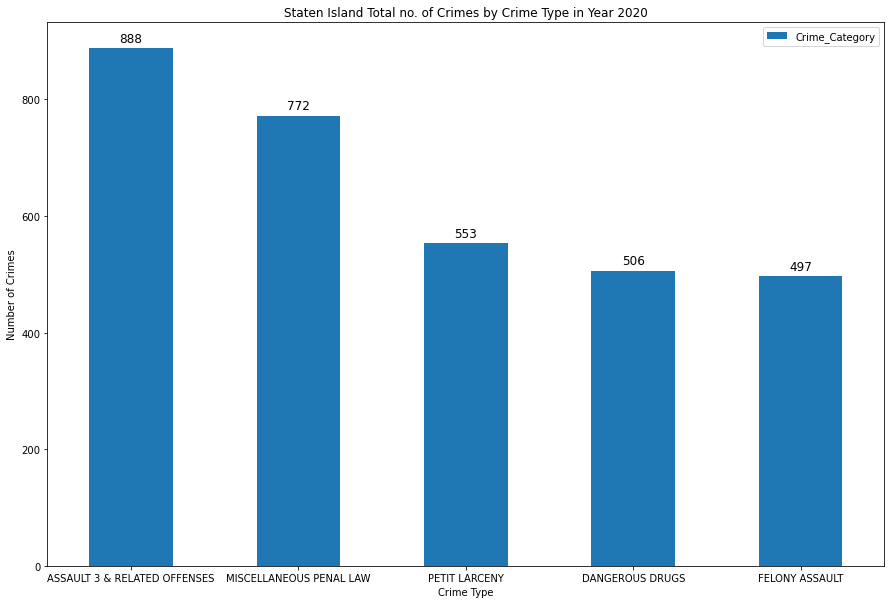

In [222]:
crmPlot = dataSTI

ax = crmPlot.plot(kind='bar', figsize=(15, 10), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Crime Type')
ax.set_title('Staten Island Total no. of Crimes by Crime Type in Year 2020') 

for i in ax.patches:
    ax.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

## Staten Island Real Estate Analysis <a name="Stage3"></a>
After Analysing the crime rate of Staten Island. We'll move forward to one of the most important thing to look for if you want to settle in a city. The Analysis of Real Estates of that city.
For that purpose the Real Estate dataset of Staten Island available on nyc gov webiste will be used here.

In [223]:
estDF = pd.read_csv('rollingsales_statenisland.csv')
estDF.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,NaN,A1,119 LENZIE STREET,NaN,...,1.0,0.0,1.0,"8,000","3,660",1998.0,1,A1,"315,000",10/2/2020
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,NaN,A1,118 ELMBANK STREET,NaN,...,1.0,0.0,1.0,"6,200","2,580",1975.0,1,A1,"450,000",6/24/2020
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,NaN,A1,7 SANDGAP STREET,NaN,...,1.0,0.0,1.0,"2,500","1,222",1925.0,1,A2,"525,000",7/2/2020
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,NaN,A1,7 SEGUINE PLACE,NaN,...,1.0,0.0,1.0,"3,989","2,300",2004.0,1,A1,"720,000",10/15/2020
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,124,NaN,A5,22 MAY PLACE,NaN,...,1.0,0.0,1.0,"2,475","2,495",1986.0,1,A5,0,9/17/2020


In [224]:
estDF.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,6248.0,6248.000000,6248.000000,0.0,6244.000000,6163.000000,5682.000000,6176.000000,5964.000000,6248.000000
mean,5.0,3538.891005,189.203265,NaN,10308.211883,1.231056,0.049630,1.274126,1969.800805,1.152849
std,0.0,2396.912074,449.692079,NaN,4.108934,2.105270,0.419135,2.127396,30.581670,0.598412
min,5.0,1.000000,1.000000,NaN,10301.000000,0.000000,0.000000,0.000000,1845.000000,1.000000
25%,5.0,1196.000000,24.000000,NaN,10305.000000,1.000000,0.000000,1.000000,1950.000000,1.000000
50%,5.0,3449.000000,54.000000,NaN,10308.000000,1.000000,0.000000,1.000000,1975.000000,1.000000
75%,5.0,5531.000000,124.000000,NaN,10312.000000,1.000000,0.000000,1.000000,1991.000000,1.000000
max,5.0,8050.000000,5341.000000,NaN,10314.000000,122.000000,15.000000,122.000000,2020.000000,4.000000


In [225]:
estDF['SALE PRICE'] = estDF['SALE PRICE'].str.replace(',', '').astype(float)
estDF['SALE PRICE'] = estDF['SALE PRICE'].astype(int)
estDF.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,NaN,A1,119 LENZIE STREET,NaN,...,1.0,0.0,1.0,"8,000","3,660",1998.0,1,A1,315000,10/2/2020
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,NaN,A1,118 ELMBANK STREET,NaN,...,1.0,0.0,1.0,"6,200","2,580",1975.0,1,A1,450000,6/24/2020
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,NaN,A1,7 SANDGAP STREET,NaN,...,1.0,0.0,1.0,"2,500","1,222",1925.0,1,A2,525000,7/2/2020
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,NaN,A1,7 SEGUINE PLACE,NaN,...,1.0,0.0,1.0,"3,989","2,300",2004.0,1,A1,720000,10/15/2020
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,124,NaN,A5,22 MAY PLACE,NaN,...,1.0,0.0,1.0,"2,475","2,495",1986.0,1,A5,0,9/17/2020


### Average Real Estate Price in Staten Island
To get the average Real Estate Price in Staten Island. The mean value of the 'SalePrice' column will be used.

In [226]:
estMean = estDF['SALE PRICE'].mean()
print("The Average Real Estate price in Staten Island is ")
print(estMean)
estDF['SALE PRICE'] = estDF['SALE PRICE'].replace(0, int(estMean))


The Average Real Estate price in Staten Island is 
480614.24967989756


### Average Real Estate Price in Staten Island by Neighborhood
To get the average Real Estate Price of Every Neighborhood in Staten Island. The mean value of the 'SalePrice' for every neighborhood will be used.

In [227]:
estLSTN = estDF['NEIGHBORHOOD'].tolist()
estLSTND = list(dict.fromkeys(estLSTN))
print((estLSTND))
estLSTS = estDF['SALE PRICE'].tolist()
combL = list(zip(estLSTN,estLSTS))

count = 0
chng = []
for i in range(0,6247):
    if estLSTN[i] != estLSTN[i-1]:
        chng.append(count)
    count+=1
chng.append(6249)
estLSTSAVG = []
c = 0
i = 0
j = 1
while c != 59:
    i = chng[0]
    if len(chng) > 1:
        j = chng[1]
        estLSTSAVG.append(statistics.mean(estLSTS[i:j]))
        del chng[0]
        c+=1
    elif len(chng) <= 1:
        break

combL = list(zip(estLSTND,estLSTSAVG))
combL

['ANNADALE', 'ARDEN HEIGHTS', 'ARROCHAR', 'ARROCHAR-SHORE ACRES', 'BLOOMFIELD', 'BULLS HEAD', 'CASTLETON CORNERS', 'CLOVE LAKES', 'CONCORD', 'CONCORD-FOX HILLS', 'DONGAN HILLS', 'DONGAN HILLS-COLONY', 'DONGAN HILLS-OLD TOWN', 'ELTINGVILLE', 'EMERSON HILL', 'FRESH KILLS', 'GRANT CITY', 'GRASMERE', 'GREAT KILLS', 'GREAT KILLS-BAY TERRACE', 'GRYMES HILL', 'HUGUENOT', 'LIVINGSTON', 'MANOR HEIGHTS', 'MARINERS HARBOR', 'MIDLAND BEACH', 'NEW BRIGHTON', 'NEW BRIGHTON-ST. GEORGE', 'NEW DORP', 'NEW DORP-BEACH', 'NEW DORP-HEIGHTS', 'NEW SPRINGVILLE', 'OAKWOOD', 'OAKWOOD-BEACH', 'PLEASANT PLAINS', 'PORT IVORY', 'PORT RICHMOND', 'PRINCES BAY', 'RICHMONDTOWN', 'RICHMONDTOWN-LIGHTHS HILL', 'ROSEBANK', 'ROSSVILLE', 'ROSSVILLE-CHARLESTON', 'ROSSVILLE-PORT MOBIL', 'ROSSVILLE-RICHMOND VALLEY', 'SILVER LAKE', 'SOUTH BEACH', 'STAPLETON', 'STAPLETON-CLIFTON', 'SUNNYSIDE', 'TODT HILL', 'TOMPKINSVILLE', 'TOTTENVILLE', 'TRAVIS', 'WEST NEW BRIGHTON', 'WESTERLEIGH', 'WILLOWBROOK', 'WOODROW']


[('ANNADALE', 659202.8444444444),
 ('ARDEN HEIGHTS', 458747.24609375),
 ('ARROCHAR', 547841.7391304348),
 ('ARROCHAR-SHORE ACRES', 598984.3157894737),
 ('BLOOMFIELD', 49607000),
 ('BULLS HEAD', 480660.989010989),
 ('CASTLETON CORNERS', 558437.1056338028),
 ('CLOVE LAKES', 521263.5111111111),
 ('CONCORD', 460887.5238095238),
 ('CONCORD-FOX HILLS', 404454.3157894737),
 ('DONGAN HILLS', 562164.359375),
 ('DONGAN HILLS-COLONY', 783509.0862068966),
 ('DONGAN HILLS-OLD TOWN', 1408538),
 ('ELTINGVILLE', 570538.7701863354),
 ('EMERSON HILL', 970688.8571428572),
 ('FRESH KILLS', 480614),
 ('GRANT CITY', 529559.007751938),
 ('GRASMERE', 569277.5454545454),
 ('GREAT KILLS', 553018.9752186589),
 ('GREAT KILLS-BAY TERRACE', 554761.5076923077),
 ('GRYMES HILL', 563406.1),
 ('HUGUENOT', 674247.823076923),
 ('LIVINGSTON', 578010.25),
 ('MANOR HEIGHTS', 583499.1134020619),
 ('MARINERS HARBOR', 428769.73652694613),
 ('MIDLAND BEACH', 468964.94782608695),
 ('NEW BRIGHTON', 551028.2573529412),
 ('NEW BRIG

In [228]:
#pd.DataFrame(crmSTI['Crime_Category'].value_counts())
#salePrDF.columns = ['Neighborhood','Average Price']
#salePrDF.loc[(4,12,43,50), 'Average Price'] = int(estMean)
#salePrDF.set_index('Neighborhood')

mod = [4,12,43,50]
for i in mod:
    estLSTSAVG[i] = int(estMean)

salePrDF = pd.DataFrame.from_records(combL)
salePrDF = pd.DataFrame({'Average Price': estLSTSAVG},
                       index = estLSTND)
salePrDF.head()

,Average Price
ANNADALE,659202.844444
ARDEN HEIGHTS,458747.246094
ARROCHAR,547841.739130
ARROCHAR-SHORE ACRES,598984.315789
BLOOMFIELD,480614.000000


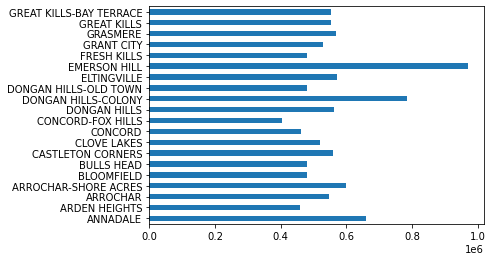

In [229]:
plotData = salePrDF[0:20]
plotData['Average Price'].plot(kind='barh')

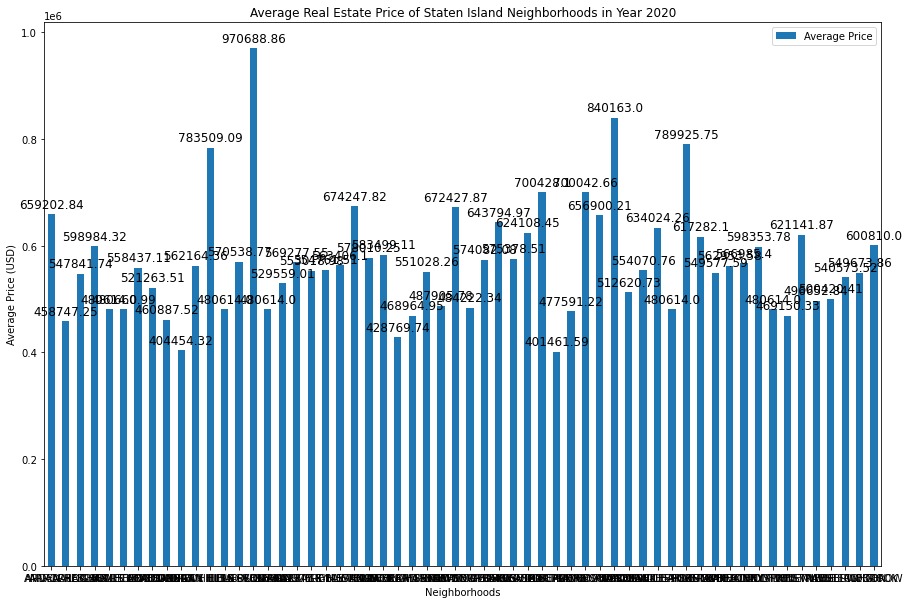

In [230]:
salePrPlot = salePrDF

ax = salePrPlot.plot(kind='bar', figsize=(15, 10), rot=0)

ax.set_ylabel('Average Price (USD)')
ax.set_xlabel('Neighborhoods')
ax.set_title('Average Real Estate Price of Staten Island Neighborhoods in Year 2020') 

for i in ax.patches:
    ax.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

### Most Expensive Neighborhoods in Staten Island <a name="Stage4"></a>
To get the Most Expensive Neighborhoods, the dataframe that has the average prices will be sorted in descending order.

In [231]:
mostEXP = salePrDF.sort_values(by = 'Average Price', ascending = False)
mostEXP.head()

,Average Price
EMERSON HILL,970688.857143
RICHMONDTOWN-LIGHTHS HILL,840163.000000
ROSSVILLE-RICHMOND VALLEY,789925.750000
DONGAN HILLS-COLONY,783509.086207
PLEASANT PLAINS,700428.102941


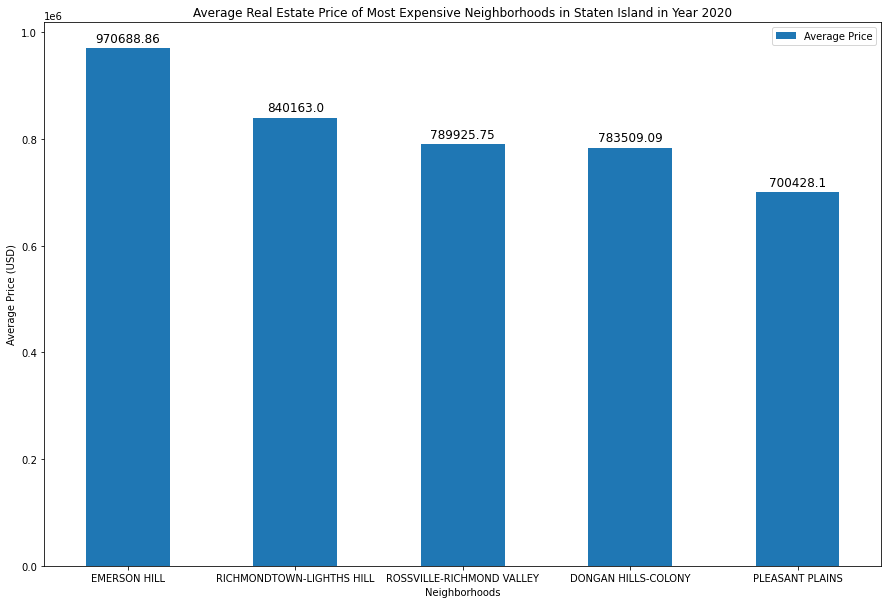

In [232]:
salePrPlot = mostEXP.head()

ax = salePrPlot.plot(kind='bar', figsize=(15, 10), rot=0)

ax.set_ylabel('Average Price (USD)')
ax.set_xlabel('Neighborhoods')
ax.set_title('Average Real Estate Price of Most Expensive Neighborhoods in Staten Island in Year 2020') 

for i in ax.patches:
    ax.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

From the above Bar Chart, one can see that Emerson Hill is the Most Expensive Neighborhood in Staten Island in terms of real estate price.

In [233]:
plotPrDF = pd.DataFrame.from_records(combL)
plotPrDF.columns = ['Neighborhood','Average Price']
plotPrDF.loc[(4,12,43,50), 'Average Price'] = int(estMean)
mostExp = plotPrDF.sort_values(by = 'Average Price', ascending = False).head()
mostExp.insert(2, 'Latitude', ['40.608715', '40.633159', '40.520105', '40.588438', '40.523994'], True)
mostExp.insert(3, 'Longitude', ['-74.095975', '-74.136532', '-74.229311', '-74.096253', '-74.215700'], True)
mostExp

,Neighborhood,Average Price,Latitude,Longitude
14,EMERSON HILL,970688.857143,40.608715,-74.095975
39,RICHMONDTOWN-LIGHTHS HILL,840163.000000,40.633159,-74.136532
44,ROSSVILLE-RICHMOND VALLEY,789925.750000,40.520105,-74.229311
11,DONGAN HILLS-COLONY,783509.086207,40.588438,-74.096253
34,PLEASANT PLAINS,700428.102941,40.523994,-74.215700


<b>Folium</b> will be used to plot the neighborhoods on map. Folium requires the Latitude and Longitude values of the neighborhoods which can be accessed from the mostExp dataframe.

In [234]:
print("Geographic Location of the Most Expensive Neighborhoods in Staten Island, Newyork City, USA")
StatenIslandMostExpNbr = folium.Map(location=[latitude, longitude], zoom_start=11)
for latitude, longitude, Neighborhood, AveragePrice in zip(mostExp['Latitude'], mostExp['Longitude'], mostExp['Neighborhood'], mostExp['Average Price']):
    label = '{}, {}'.format(school, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        ).add_to(StatenIslandMostExpNbr)  
    
StatenIslandMostExpNbr

Geographic Location of the Most Expensive Neighborhoods in Staten Island, Newyork City, USA


### Least Expensive Neighborhoods in Staten Island <a name="Stage5"></a>
To get the Least Expensive Neighborhoods, the dataframe that has the average prices will be sorted in ascending order.

In [235]:
leastEXP = salePrDF.sort_values(by = 'Average Price')
leastEXP.head()

,Average Price
PORT IVORY,401461.589744
CONCORD-FOX HILLS,404454.315789
MARINERS HARBOR,428769.736527
ARDEN HEIGHTS,458747.246094
CONCORD,460887.523810


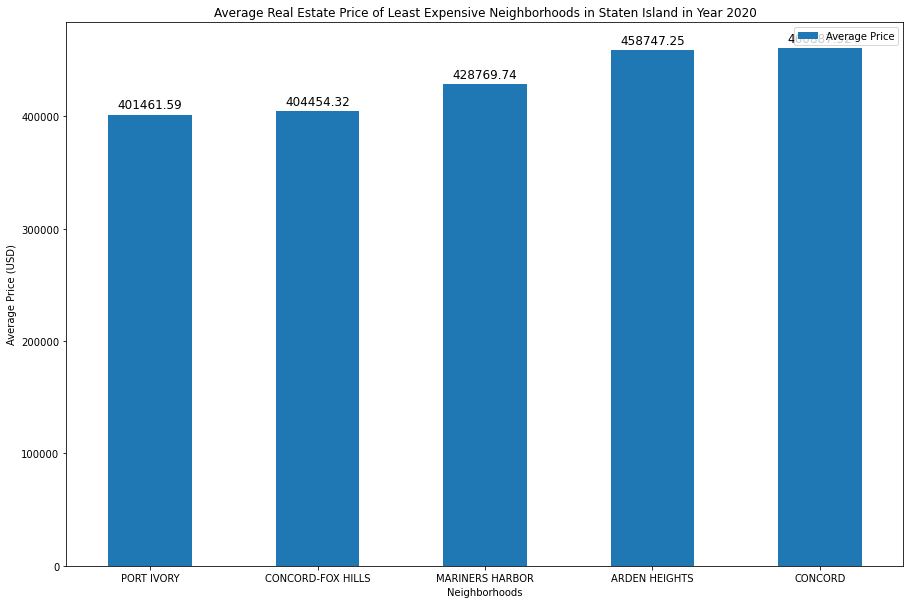

In [236]:
salePrPlot = leastEXP.head()

ax = salePrPlot.plot(kind='bar', figsize=(15, 10), rot=0)

ax.set_ylabel('Average Price (USD)')
ax.set_xlabel('Neighborhoods')
ax.set_title('Average Real Estate Price of Least Expensive Neighborhoods in Staten Island in Year 2020') 

for i in ax.patches:
    ax.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

From the above Bar Chart, one can see that Port Ivory is the Least Expensive Neighborhood in Staten Island in terms of real estate price.

In [237]:
plotPrDF = pd.DataFrame.from_records(combL)
plotPrDF.columns = ['Neighborhood','Average Price']
plotPrDF.loc[(4,12,43,50), 'Average Price'] = int(estMean)
leastExp = plotPrDF.sort_values(by = 'Average Price', ascending = True).head()
leastExp.insert(2, 'Latitude', ['40.640937', '40.608160', '40.636770', '40.555892', '40.600338'], True)
leastExp.insert(3, 'Longitude', ['-74.180144', '-74.084308', '-74.158755', '-74.173275', '-74.076240'], True)
leastExp

,Neighborhood,Average Price,Latitude,Longitude
35,PORT IVORY,401461.589744,40.640937,-74.180144
9,CONCORD-FOX HILLS,404454.315789,40.608160,-74.084308
24,MARINERS HARBOR,428769.736527,40.636770,-74.158755
1,ARDEN HEIGHTS,458747.246094,40.555892,-74.173275
8,CONCORD,460887.523810,40.600338,-74.076240


<b>Folium</b> will be used to plot the neighborhoods on map. Folium requires the Latitude and Longitude values of the neighborhoods which can be accessed from the leastExp dataframe.

In [238]:
print("Geographic Location of the Least Expensive Neighborhoods in Staten Island, Newyork City, USA")
StatenIslandLeastExpNbr = folium.Map(location=[latitude, longitude], zoom_start=11)
for latitude, longitude, Neighborhood, AveragePrice in zip(leastExp['Latitude'], leastExp['Longitude'], leastExp['Neighborhood'], leastExp['Average Price']):
    label = '{}, {}'.format(school, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        ).add_to(StatenIslandLeastExpNbr)  
    
StatenIslandLeastExpNbr


Geographic Location of the Least Expensive Neighborhoods in Staten Island, Newyork City, USA


## Staten Island Schools Analysis <a name="Stage6"></a>
After Real Estate, We move down to School Analysis of Staten Island. For this task, USA Public Schools dataset available on Kaggle will be used. The Dataset contains information regarding Schools from all over the USA but we only need information about Staten Isalnd schools to the dataset will be cleaned furthur to include only that.

In [239]:
schoolDF = pd.read_csv('Public_Schools.csv')
schoolDF.head()

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-81.050895,29.022271,2002,120192008041,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,...,IMAGERY,2014-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,222,KG,05,1201920,13,NOT AVAILABLE
1,-92.507288,31.180659,2003,220129002344,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,...,IMAGERY/OTHER,2015-06-19T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,312,PK,08,2201290,21,NOT AVAILABLE
2,-69.971880,43.908147,2004,230378023129,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,NOT AVAILABLE,...,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,02,05,2303780,52,NOT AVAILABLE
3,-89.542799,32.728496,2005,280252001118,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,NOT AVAILABLE,...,IMAGERY/OTHER,2010-07-06T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1159,PK,05,2802520,63,NOT AVAILABLE
4,-94.361775,39.364359,2006,291645000891,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,8518,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,274,KG,05,2916450,22,NOT AVAILABLE


In [240]:
schoolDF1 = schoolDF.loc[schoolDF['CITY']=='STATEN ISLAND']
schoolDF1.head()

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
1565,-74.079159,40.642789,6575,360010302861,RALPH R MCKEE CAREER AND TECHNICAL EDUCATION H...,290 ST MARKS PL,STATEN ISLAND,NY,10301,1855,...,IMAGERY,2010-06-16T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,622,09,12,3600103,37,NOT AVAILABLE
1846,-74.158830,40.581986,6856,360010305835,CSI HIGH SCHOOL FOR INTERNATIONAL STUDIES,100 ESSEX DR,STATEN ISLAND,NY,10314,NOT AVAILABLE,...,IMAGERY/OTHER,2010-06-11T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,520,09,12,3600103,30,NOT AVAILABLE
3034,-74.077078,40.620735,13060,360013502864,RICHARD H HUNGERFORD SCHOOL (THE),155 TOMPKINS AVE,STATEN ISLAND,NY,10304,NOT AVAILABLE,...,IMAGERY,2010-06-16T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2,389,06,06,3600135,66,NOT AVAILABLE
3871,-74.151034,40.625070,13897,360010302113,PS 22 GRANITEVILLE,1860 FOREST AVE,STATEN ISLAND,NY,10303,2191,...,IMAGERY,2010-06-16T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1051,PK,05,3600103,64,NOT AVAILABLE
5894,-74.125076,40.561674,896,360010302220,PS 50 FRANK HANKINSON,200 ADELAIDE AVE,STATEN ISLAND,NY,10306,3999,...,IMAGERY/OTHER,2016-08-17T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,856,PK,05,3600103,57,NOT AVAILABLE


In [241]:
schoolDF2 = schoolDF1[['NAME', 'ADDRESS', 'POPULATION', 'CITY', 'COUNTY', 'STATE', 'LATITUDE', 'LONGITUDE']]
schoolDF2.columns = ['School Name', 'School Address',  'Total Students','Borough', 'County', 'State', 'Latitude', 'Longitude']
schoolDF2.head()


,School Name,School Address,Total Students,Borough,County,State,Latitude,Longitude
1565,RALPH R MCKEE CAREER AND TECHNICAL EDUCATION H...,290 ST MARKS PL,659,STATEN ISLAND,RICHMOND,NY,40.642789,-74.079159
1846,CSI HIGH SCHOOL FOR INTERNATIONAL STUDIES,100 ESSEX DR,550,STATEN ISLAND,RICHMOND,NY,40.581986,-74.158830
3034,RICHARD H HUNGERFORD SCHOOL (THE),155 TOMPKINS AVE,455,STATEN ISLAND,RICHMOND,NY,40.620735,-74.077078
3871,PS 22 GRANITEVILLE,1860 FOREST AVE,1115,STATEN ISLAND,RICHMOND,NY,40.625070,-74.151034
5894,PS 50 FRANK HANKINSON,200 ADELAIDE AVE,913,STATEN ISLAND,RICHMOND,NY,40.561674,-74.125076


<b>Folium</b> will be used to plot the schools on map. Folium requires the Latitude and Longitude values of the schools which can be accessed from the schoolDF2 dataframe.

In [242]:
print("Geographic Location of Schools in Staten Island, Newyork City, USA")
StatenIslandSchoolMap = folium.Map(location=[latitude, longitude], zoom_start=11)
for latitude, longitude, borough, school in zip(schoolDF2['Latitude'], schoolDF2['Longitude'], schoolDF2['Borough'], schoolDF2['School Name']):
    label = '{}, {}'.format(school, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        ).add_to(StatenIslandSchoolMap)  
    
StatenIslandSchoolMap

Geographic Location of Schools in Staten Island, Newyork City, USA


## Staten Island Hospitals Analysis <a name='Stage7'></a>
After School Analysis, We'll look into Staten Island Hospitals. For this task, two datasets will be used. First dataset is the USA Hospitals dataset available on Kaggle. This dataset includes Hospital name, location etc and second dataset is the USA Hospitals Ratings and Features dataset available on Kaggle. This dataset includes Hospitals Ratings and many Features. Both datasets will be merged together to include only the required attributes

In [243]:
hospitalDF = pd.read_csv('Hospitals.csv')
hospitalDF.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE


In [244]:
hospitalDF1 = hospitalDF.loc[hospitalDF['CITY']=='STATEN ISLAND']
hospitalDF1.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
5671,-74.075355,40.622428,13608,19210304,RICHMOND UNIVERSITY MEDICAL CENTER - BAYLEY SE...,75 VANDERBILT AVE,STATEN ISLAND,NY,10304,NOT AVAILABLE,...,2017-12-22T00:00:00.000Z,http://rumcsi.org/main/behavioralhealth.aspx,7004006H,NOT AVAILABLE,36.0,NON-PROFIT,-999.0,25.0,NOT AVAILABLE,NOT AVAILABLE
5692,-74.105938,40.635902,13629,20610301,RICHMOND UNIVERSITY MEDICAL CENTER - MAIN CAMPUS,355 BARD AVE,STATEN ISLAND,NY,10301,NOT AVAILABLE,...,2017-12-22T00:00:00.000Z,http://www.rumcsi.org/Main/Home.aspx,7004010H,NOT AVAILABLE,36.0,NON-PROFIT,-999.0,448.0,"I, II PEDIATRIC",NOT AVAILABLE
5693,-74.086220,40.584985,13630,20710305,STATEN ISLAND UNIVERSITY HOSPITAL - NORTH,475 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,...,2017-12-22T00:00:00.000Z,http://www.siuh.edu/,7004003H,NOT AVAILABLE,36.0,NON-PROFIT,-999.0,508.0,"I, I PEDIATRIC",Y
5770,-74.091820,40.603064,13707,120210304,STATEN ISLAND UNIV HOSP-CONCORD DIV,1050 TARGEE STREET,STATEN ISLAND,NY,10304,NOT AVAILABLE,...,2017-12-22T00:00:00.000Z,NOT AVAILABLE,7004005H,NOT AVAILABLE,36.0,GOVERNMENT - STATE,-999.0,-999.0,NOT AVAILABLE,NOT AVAILABLE
6477,-74.080617,40.582015,14415,167684192,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,STATEN ISLAND,NY,10305,NOT AVAILABLE,...,2017-12-22T00:00:00.000Z,https://www.omh.ny.gov/omhweb/facilities/sbpc/,NOT AVAILABLE,NOT AVAILABLE,36.0,GOVERNMENT - STATE,-999.0,-999.0,NOT AVAILABLE,NOT AVAILABLE


In [245]:
hospitalDF2 = hospitalDF1[['NAME', 'ADDRESS', 'POPULATION', 'CITY', 'COUNTY', 'STATE', 'LATITUDE', 'LONGITUDE']]
hospitalDF2.columns = ['Hospital Name', 'Hospital Address',  'Hospital Population','Borough', 'County', 'State', 'Latitude', 'Longitude']
hospitalDF2.head()


,Hospital Name,Hospital Address,Hospital Population,Borough,County,State,Latitude,Longitude
5671,RICHMOND UNIVERSITY MEDICAL CENTER - BAYLEY SE...,75 VANDERBILT AVE,25,STATEN ISLAND,RICHMOND,NY,40.622428,-74.075355
5692,RICHMOND UNIVERSITY MEDICAL CENTER - MAIN CAMPUS,355 BARD AVE,448,STATEN ISLAND,RICHMOND,NY,40.635902,-74.105938
5693,STATEN ISLAND UNIVERSITY HOSPITAL - NORTH,475 SEAVIEW AVENUE,508,STATEN ISLAND,RICHMOND,NY,40.584985,-74.086220
5770,STATEN ISLAND UNIV HOSP-CONCORD DIV,1050 TARGEE STREET,-999,STATEN ISLAND,RICHMOND,NY,40.603064,-74.091820
6477,SOUTH BEACH PSYCHIATRIC CENTER,777 SEAVIEW AVENUE,-999,STATEN ISLAND,RICHMOND,NY,40.582015,-74.080617


<b>Folium</b> will be used to plot the Hospitals on map. Folium requires the Latitude and Longitude values of the schools which can be accessed from the hospitalDF2 dataframe.

In [246]:
print("Geographic Location of Hospitals in Staten Island, Newyork City, USA")

StatenIslandHospitalMap = folium.Map(location=[latitude, longitude], zoom_start=11)
for latitude, longitude, borough, hospital in zip(hospitalDF2['Latitude'], hospitalDF2['Longitude'], hospitalDF2['Borough'], hospitalDF2['Hospital Name']):
    label = '{}, {}'.format(hospital, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        ).add_to(StatenIslandHospitalMap)  
    
StatenIslandHospitalMap

Geographic Location of Hospitals in Staten Island, Newyork City, USA


### Staten Island Hospitals Features

In [247]:
hospitalRateDF = pd.read_csv('Hospital General Information.csv',
                            encoding="ISO-8859-1")
hospitalRateDF = hospitalRateDF.loc[hospitalRateDF['City']=='STATEN ISLAND']
hospitalRateDF2 = hospitalRateDF[['City','Hospital Type','Emergency Services',
                                  'Meets criteria for meaningful use of EHRs',
                                  'Hospital overall rating','Safety of care national comparison',
                                  'Patient experience national comparison',
                                  'Effectiveness of care national comparison',
                                  'Efficient use of medical imaging national comparison']]
hospitalRateDF2

,City,Hospital Type,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Safety of care national comparison,Patient experience national comparison,Effectiveness of care national comparison,Efficient use of medical imaging national comparison
2833,STATEN ISLAND,Acute Care Hospitals,Yes,Y,1,Below the national average,Below the national average,Same as the national average,Not Available
2886,STATEN ISLAND,Acute Care Hospitals,Yes,Y,1,Below the national average,Below the national average,Below the national average,Same as the national average


From the above dataframe, one can anaylse what is the rating of the hospitals and what are the pros and cons of the hospitals in Staten Island.

## Staten Island Neighborhoods Analysis <a name='Stage8'></a>
In the section, All of the neighborhoods in Staten Island will be gathered togther. The names of the neighborhoods are avaialable on Wikipedia. The names will be used for furthur analysis.

In [249]:
#Staten island neighborhoods
nbrSTI = ['Annadale','Arlington','Arrochar','Bay Terrace','Bloomfield',
          'Bulls Head','Castleton Corners','Charleston',
          'Chelsea','Clifton','Concord','Dongan Hills',
          'Elm Park','Eltingville','Emerson Hill','Fort Wadsworth','Graniteville',
          'Grant City','Grasmere','Great Kills','Greenridge','Grymes Hill',
          'Hamilton Park','Heartland Village','Huguenot',
          'Mariners Harbor','Midland Beach',
          'New Brighton','New Dorp','New Springville','Oakwood','Old Place','Old Town',
          'Pleasant Plains','Port Ivory','Port Richmond','Princes Bay','Randall Manor',
          'Richmond Valley','Rosebank','Rossville','Saint George',
          'South Beach','Stapleton',
          'Sunnyside','Todt Hill','Tompkinsville','Tottenville',
          'Travis','West New Brighton','Westerleigh',
          'Willowbrook','Woodrow']
nbrSTIdf = []
Latitude = []
Longitude = []

for i in range(len(nbrSTI)):
    nbrSTIdf.append('Staten Island')
    Latitude.append('')
    Longitude.append('')

df = {'Neighborhood': nbrSTI,'Borough':nbrSTIdf,'Latitude': Latitude,'Longitude':Longitude}
df1 = pd.DataFrame(data=df, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
df1.head()

,Neighborhood,Borough,Latitude,Longitude
0,Annadale,Staten Island,,
1,Arlington,Staten Island,,
2,Arrochar,Staten Island,,
3,Bay Terrace,Staten Island,,
4,Bloomfield,Staten Island,,


The name for the all the Neighborhoods will be used to get the latitude and longitude values for all the Neighborhoods using <b>Geocode</b>.

In [250]:
address = 'Staten Island, New York'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
print(location)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island, New York are {}, {}.'.format(latitude, longitude))

Staten Island, Richmond County, New York, United States
The geograpical coordinate of Staten Island, New York are 40.5834557, -74.1496048.


In [251]:
Latitude = []
Longitude = []

for i in range(len(nbrSTIdf)):
    address = '{}, Staten Island, New York'.format(nbrSTI[i])
#    print(address)
    geolocator = Nominatim(user_agent="ld_explorer")
    location = geolocator.geocode(address)
    print(location)
#    print(type(location))
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print("\n Latitude & Longitude Values for all Neighborhoods in Staten Island, New York, USA\n")
print(Latitude, Longitude)

Annadale, Staten Island, Richmond County, New York, 10312, United States
Arlington, Staten Island, Richmond County, New York, 10303, United States
Arrochar, Staten Island, Richmond County, New York, 10305, United States
Bay Terrace, Staten Island, Richmond County, New York, 10307:10312, United States
Bloomfield, Staten Island, Richmond County, New York, 10311, United States
Bulls Head, Staten Island, Richmond County, New York, 10311, United States
Castleton Corners, Staten Island, Richmond County, New York, 10310, United States
Charleston, Staten Island, Richmond County, New York, 10309, United States
Chelsea, Staten Island, Richmond County, New York, 10311, United States
Clifton, Staten Island, Richmond County, New York, 10304, United States
Concord, Staten Island, Richmond County, New York, 10304, United States
Dongan Hills, Staten Island, Richmond County, New York, 10305, United States
Elm Park, Staten Island, Richmond County, New York, 10303, United States
Eltingville, Staten Islan

In [252]:
df = {'Neighborhood': nbrSTI,'Borough':nbrSTIdf,'Latitude': Latitude,'Longitude':Longitude}
df1 = pd.DataFrame(data=df, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
df1.head()

,Neighborhood,Borough,Latitude,Longitude
0,Annadale,Staten Island,40.544550,-74.176532
1,Arlington,Staten Island,40.632326,-74.165144
2,Arrochar,Staten Island,40.598438,-74.072641
3,Bay Terrace,Staten Island,40.555278,-74.134167
4,Bloomfield,Staten Island,40.612604,-74.178200


<b>Folium</b> will be used to plot all of neighborhoods on map. Folium requires the Latitude and Longitude values of the neighborhoods which can be accessed from the df1 dataframe.

In [253]:
print("Geographic Location of Neighborhoods in Staten Island, Newyork City, USA")

StatenIslandMap = folium.Map(location=[latitude, longitude], zoom_start=11)
for latitude, longitude, borough, neighbourhood in zip(df1['Latitude'], df1['Longitude'], df1['Borough'], df1['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        ).add_to(StatenIslandMap)  
    
StatenIslandMap

Geographic Location of Neighborhoods in Staten Island, Newyork City, USA


#### FourSquare API
FourSquare API wil be used to get the nearby venus of every neighborhood in Staten Island.

In [254]:
CLIENT_ID = 'I4V1OPH32H1TSKGECCCUQC3HQCJV4OO0UKL3MTBSCGPUX0FY' 
CLIENT_SECRET = 'CSRVXQBGPEPGC4V5BVPVUMH4F21KS2ME3Z0J2SPKT3RICSBA'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I4V1OPH32H1TSKGECCCUQC3HQCJV4OO0UKL3MTBSCGPUX0FY
CLIENT_SECRET:CSRVXQBGPEPGC4V5BVPVUMH4F21KS2ME3Z0J2SPKT3RICSBA


#### Get top 100 venus within radius of 500


In [255]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=I4V1OPH32H1TSKGECCCUQC3HQCJV4OO0UKL3MTBSCGPUX0FY&client_secret=CSRVXQBGPEPGC4V5BVPVUMH4F21KS2ME3Z0J2SPKT3RICSBA&v=20180605&ll=40.5434385,-74.1976441&radius=500&limit=100'

In [256]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [257]:
venSTI = getNearbyVenues(df1['Neighborhood'], df1['Latitude'], df1['Longitude'])

Annadale
Arlington
Arrochar
Bay Terrace
Bloomfield
Bulls Head
Castleton Corners
Charleston
Chelsea
Clifton
Concord
Dongan Hills
Elm Park
Eltingville
Emerson Hill
Fort Wadsworth
Graniteville
Grant City
Grasmere
Great Kills
Greenridge
Grymes Hill
Hamilton Park
Heartland Village
Huguenot
Mariners Harbor
Midland Beach
New Brighton
New Dorp
New Springville
Oakwood
Old Place
Old Town
Pleasant Plains
Port Ivory
Port Richmond
Princes Bay
Randall Manor
Richmond Valley
Rosebank


ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?&client_id=I4V1OPH32H1TSKGECCCUQC3HQCJV4OO0UKL3MTBSCGPUX0FY&client_secret=CSRVXQBGPEPGC4V5BVPVUMH4F21KS2ME3Z0J2SPKT3RICSBA&v=20180605&ll=40.6139932,-74.0662521&radius=500&limit=100 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000160542DF6A0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed'))

In [258]:
print(venSTI.shape)
venSTI.head()

(765, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Annadale,40.54455,-74.176532,Annadale Diner,40.542079,-74.177325,Diner
1,Annadale,40.54455,-74.176532,Annadale Terrace,40.542555,-74.177187,Restaurant
2,Annadale,40.54455,-74.176532,Il Sogno,40.541286,-74.178489,Restaurant
3,Annadale,40.54455,-74.176532,MTA SIR - Annadale,40.540482,-74.178185,Train Station
4,Annadale,40.54455,-74.176532,MTA Bus - Annadale Rd & Arden Av (S55),40.544326,-74.176667,Bus Stop


In [259]:
#Get Total number of venus of each neighborhood
venSTI1 = venSTI[['Neighborhood','Venue']]
venSTI1.groupby('Neighborhood').count().head()

,Venue
Neighborhood,
Annadale,23
Arlington,6
Arrochar,9
Bay Terrace,5
Bloomfield,11


In [260]:
print('There are {} uniques categories.'.format(len(venSTI['Venue Category'].unique())))

There are 177 uniques categories.


### One Hot Encoding

In [261]:
# one hot encoding
STI_onehot = pd.get_dummies(venSTI[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
STI_onehot['Neighborhood'] = venSTI['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [STI_onehot.columns[-1]] + list(STI_onehot.columns[:-1])
STI_onehot = STI_onehot[fixed_columns]
STI_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Yoga Studio
0,Annadale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Annadale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Annadale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Annadale,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Annadale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
STI_grouped = STI_onehot.groupby('Neighborhood').mean().reset_index()
STI_grouped.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Yoga Studio
0,Annadale,0.0,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Arlington,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Arrochar,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bay Terrace,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bloomfield,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0,0.0


In [264]:
num_top_venues = 5

for hood in STI_grouped['Neighborhood']:
    print("----"+str(hood)+"----")
    temp = STI_grouped[STI_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                 venue  freq
0          Pizza Place  0.17
1           Restaurant  0.09
2  American Restaurant  0.09
3     Business Service  0.09
4               Bakery  0.04


----Arlington----
                        venue  freq
0                    Bus Stop  0.50
1               Deli / Bodega  0.17
2  Construction & Landscaping  0.17
3         American Restaurant  0.17
4                         Pub  0.00


----Arrochar----
           venue  freq
0       Bus Stop  0.22
1           Park  0.22
2  Deli / Bodega  0.11
3     Bagel Shop  0.11
4    Pizza Place  0.11


----Bay Terrace----
                   venue  freq
0    American Restaurant   0.2
1             Playground   0.2
2          Train Station   0.2
3             Food Truck   0.2
4  Performing Arts Venue   0.2


----Bloomfield----
                venue  freq
0               Hotel  0.27
1            Tea Room  0.09
2  Italian Restaurant  0.09
3    Department Store  0.09
4        Cocktail Bar  0.09


----Bulls Head---

4            Bus Stop   0.2




### Most Common Venues <a name='Stage9'></a>

In [265]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [266]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
mergedVen = pd.DataFrame(columns=columns)
mergedVen['Neighborhood'] = STI_grouped['Neighborhood']

for ind in np.arange(STI_grouped.shape[0]):
    mergedVen.iloc[ind, 1:] = return_most_common_venues(STI_grouped.iloc[ind, :], num_top_venues)
mergedVen

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Business Service,American Restaurant,Restaurant,Diner,Bar,Bakery,Bus Stop,Food,Deli / Bodega
1,Arlington,Bus Stop,Construction & Landscaping,American Restaurant,Deli / Bodega,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Event Space,Event Service
2,Arrochar,Park,Bus Stop,Bagel Shop,Cosmetics Shop,Pizza Place,Deli / Bodega,Nail Salon,Yoga Studio,Event Space,Event Service
3,Bay Terrace,American Restaurant,Playground,Food Truck,Train Station,Performing Arts Venue,Yoga Studio,Dim Sum Restaurant,Event Space,Event Service,Dry Cleaner
4,Bloomfield,Hotel,Tea Room,Cocktail Bar,Video Store,Candy Store,Rental Car Location,Italian Restaurant,Spa,Department Store,Dim Sum Restaurant
5,Bulls Head,Pharmacy,Diner,Baseball Field,Playground,Café,Bank,Sandwich Place,Bus Stop,Deli / Bodega,Tattoo Parlor
6,Castleton Corners,Pizza Place,Ice Cream Shop,Bank,Deli / Bodega,Diner,Clothing Store,Chocolate Shop,Optical Shop,Dessert Shop,Bus Stop
7,Charleston,Construction & Landscaping,Food,Deli / Bodega,German Restaurant,Bakery,Scenic Lookout,General Entertainment,Restaurant,Music Venue,Rental Car Location
8,Chelsea,Clothing Store,Gym / Fitness Center,Bus Station,Bagel Shop,Bus Stop,Department Store,Boxing Gym,Arcade,Recreation Center,Cosmetics Shop
9,Clifton,Bus Stop,Train Station,Baseball Field,Discount Store,Deli / Bodega,Grocery Store,ATM,Intersection,Chinese Restaurant,Cultural Center


### K-Means Clustering <a name='Stage10'></a>

For comparison between all of the aforementioned places and getting the most visited venues in every neighborhood of Staten Island. K-Means will be used to cluster neighborhoods based on most vists and other similarities.

In [267]:
# Using K-Means to cluster neighborhood into 5 clusters
kClusters = 5
STI_grouped_clustering = STI_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kClusters, random_state=0).fit(STI_grouped_clustering)
kmeans.labels_[0:10]

array([2, 1, 1, 0, 0, 2, 2, 0, 2, 1])

In [268]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels',1)
mergedVen.insert(0, 'Cluster Labels', kmeans.labels_)

In [269]:
mergedVen

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Annadale,Pizza Place,Business Service,American Restaurant,Restaurant,Diner,Bar,Bakery,Bus Stop,Food,Deli / Bodega
1,1,Arlington,Bus Stop,Construction & Landscaping,American Restaurant,Deli / Bodega,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Event Space,Event Service
2,1,Arrochar,Park,Bus Stop,Bagel Shop,Cosmetics Shop,Pizza Place,Deli / Bodega,Nail Salon,Yoga Studio,Event Space,Event Service
3,0,Bay Terrace,American Restaurant,Playground,Food Truck,Train Station,Performing Arts Venue,Yoga Studio,Dim Sum Restaurant,Event Space,Event Service,Dry Cleaner
4,0,Bloomfield,Hotel,Tea Room,Cocktail Bar,Video Store,Candy Store,Rental Car Location,Italian Restaurant,Spa,Department Store,Dim Sum Restaurant
5,2,Bulls Head,Pharmacy,Diner,Baseball Field,Playground,Café,Bank,Sandwich Place,Bus Stop,Deli / Bodega,Tattoo Parlor
6,2,Castleton Corners,Pizza Place,Ice Cream Shop,Bank,Deli / Bodega,Diner,Clothing Store,Chocolate Shop,Optical Shop,Dessert Shop,Bus Stop
7,0,Charleston,Construction & Landscaping,Food,Deli / Bodega,German Restaurant,Bakery,Scenic Lookout,General Entertainment,Restaurant,Music Venue,Rental Car Location
8,2,Chelsea,Clothing Store,Gym / Fitness Center,Bus Station,Bagel Shop,Bus Stop,Department Store,Boxing Gym,Arcade,Recreation Center,Cosmetics Shop
9,1,Clifton,Bus Stop,Train Station,Baseball Field,Discount Store,Deli / Bodega,Grocery Store,ATM,Intersection,Chinese Restaurant,Cultural Center


In [270]:
mergedVenSTI = df1
mergedVenSTI = mergedVenSTI.join(mergedVen.set_index('Neighborhood'), on='Neighborhood')
mergedVenSTI

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Staten Island,40.544550,-74.176532,2.0,Pizza Place,Business Service,American Restaurant,Restaurant,Diner,Bar,Bakery,Bus Stop,Food,Deli / Bodega
1,Arlington,Staten Island,40.632326,-74.165144,1.0,Bus Stop,Construction & Landscaping,American Restaurant,Deli / Bodega,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Event Space,Event Service
2,Arrochar,Staten Island,40.598438,-74.072641,1.0,Park,Bus Stop,Bagel Shop,Cosmetics Shop,Pizza Place,Deli / Bodega,Nail Salon,Yoga Studio,Event Space,Event Service
3,Bay Terrace,Staten Island,40.555278,-74.134167,0.0,American Restaurant,Playground,Food Truck,Train Station,Performing Arts Venue,Yoga Studio,Dim Sum Restaurant,Event Space,Event Service,Dry Cleaner
4,Bloomfield,Staten Island,40.612604,-74.178200,0.0,Hotel,Tea Room,Cocktail Bar,Video Store,Candy Store,Rental Car Location,Italian Restaurant,Spa,Department Store,Dim Sum Restaurant
5,Bulls Head,Staten Island,40.607048,-74.162088,2.0,Pharmacy,Diner,Baseball Field,Playground,Café,Bank,Sandwich Place,Bus Stop,Deli / Bodega,Tattoo Parlor
6,Castleton Corners,Staten Island,40.613160,-74.122365,2.0,Pizza Place,Ice Cream Shop,Bank,Deli / Bodega,Diner,Clothing Store,Chocolate Shop,Optical Shop,Dessert Shop,Bus Stop
7,Charleston,Staten Island,40.536772,-74.237367,0.0,Construction & Landscaping,Food,Deli / Bodega,German Restaurant,Bakery,Scenic Lookout,General Entertainment,Restaurant,Music Venue,Rental Car Location
8,Chelsea,Staten Island,40.600660,-74.194867,2.0,Clothing Store,Gym / Fitness Center,Bus Station,Bagel Shop,Bus Stop,Department Store,Boxing Gym,Arcade,Recreation Center,Cosmetics Shop
9,Clifton,Staten Island,40.620104,-74.077086,1.0,Bus Stop,Train Station,Baseball Field,Discount Store,Deli / Bodega,Grocery Store,ATM,Intersection,Chinese Restaurant,Cultural Center


In [271]:
mergedVenSTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            53 non-null     object 
 1   Borough                 53 non-null     object 
 2   Latitude                53 non-null     float64
 3   Longitude               53 non-null     float64
 4   Cluster Labels          52 non-null     float64
 5   1st Most Common Venue   52 non-null     object 
 6   2nd Most Common Venue   52 non-null     object 
 7   3rd Most Common Venue   52 non-null     object 
 8   4th Most Common Venue   52 non-null     object 
 9   5th Most Common Venue   52 non-null     object 
 10  6th Most Common Venue   52 non-null     object 
 11  7th Most Common Venue   52 non-null     object 
 12  8th Most Common Venue   52 non-null     object 
 13  9th Most Common Venue   52 non-null     object 
 14  10th Most Common Venue  52 non-null     obje

In [272]:
mergedVenSTI.dropna(inplace = True)

In [273]:
mergedVenSTI['Cluster Labels'] = mergedVenSTI['Cluster Labels'].astype(int)

In [274]:
mergedVenSTI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            52 non-null     object 
 1   Borough                 52 non-null     object 
 2   Latitude                52 non-null     float64
 3   Longitude               52 non-null     float64
 4   Cluster Labels          52 non-null     int32  
 5   1st Most Common Venue   52 non-null     object 
 6   2nd Most Common Venue   52 non-null     object 
 7   3rd Most Common Venue   52 non-null     object 
 8   4th Most Common Venue   52 non-null     object 
 9   5th Most Common Venue   52 non-null     object 
 10  6th Most Common Venue   52 non-null     object 
 11  7th Most Common Venue   52 non-null     object 
 12  8th Most Common Venue   52 non-null     object 
 13  9th Most Common Venue   52 non-null     object 
 14  10th Most Common Venue  52 non-null     obje

### Cluster Analysis <a name='Stage11'></a>
After performing K-means clustering on every neighborhood and their venues. All of the venues will be clustered based on their most visits and location.

In [275]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kClusters)
ys = [i + x + (i*x)**2 for i in range(kClusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mergedVenSTI['Latitude'], mergedVenSTI['Longitude'], mergedVenSTI['Neighborhood'], mergedVenSTI['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 1

In [276]:
mergedVenSTI[mergedVenSTI['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bay Terrace,Staten Island,40.555278,-74.134167,0,American Restaurant,Playground,Food Truck,Train Station,Performing Arts Venue,Yoga Studio,Dim Sum Restaurant,Event Space,Event Service,Dry Cleaner
4,Bloomfield,Staten Island,40.612604,-74.178200,0,Hotel,Tea Room,Cocktail Bar,Video Store,Candy Store,Rental Car Location,Italian Restaurant,Spa,Department Store,Dim Sum Restaurant
7,Charleston,Staten Island,40.536772,-74.237367,0,Construction & Landscaping,Food,Deli / Bodega,German Restaurant,Bakery,Scenic Lookout,General Entertainment,Restaurant,Music Venue,Rental Car Location
14,Emerson Hill,Staten Island,40.608715,-74.095975,0,Construction & Landscaping,Historic Site,Grocery Store,Market,Yoga Studio,Diner,Farmers Market,Event Space,Event Service,Dry Cleaner
17,Grant City,Staten Island,40.582049,-74.104864,0,Convenience Store,American Restaurant,Rental Car Location,Train Station,Locksmith,Bank,BBQ Joint,Yoga Studio,Doctor's Office,Fast Food Restaurant
21,Grymes Hill,Staten Island,40.618715,-74.093475,0,Hookah Bar,Gym,Theater,Golf Course,Trail,Coffee Shop,Gym / Fitness Center,Dessert Shop,Event Service,Dry Cleaner
24,Huguenot,Staten Island,40.537328,-74.194588,0,Moving Target,Event Service,Train Station,Italian Restaurant,Yoga Studio,Diner,Farmers Market,Event Space,Dry Cleaner,Donut Shop
37,Randall Manor,Staten Island,40.644199,-74.104576,0,Museum,Garden,History Museum,Historic Site,Cultural Center,Park,New American Restaurant,Event Space,Botanical Garden,Mediterranean Restaurant


#### Cluster 2

In [277]:
mergedVenSTI[mergedVenSTI['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arlington,Staten Island,40.632326,-74.165144,1,Bus Stop,Construction & Landscaping,American Restaurant,Deli / Bodega,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Event Space,Event Service
2,Arrochar,Staten Island,40.598438,-74.072641,1,Park,Bus Stop,Bagel Shop,Cosmetics Shop,Pizza Place,Deli / Bodega,Nail Salon,Yoga Studio,Event Space,Event Service
9,Clifton,Staten Island,40.620104,-74.077086,1,Bus Stop,Train Station,Baseball Field,Discount Store,Deli / Bodega,Grocery Store,ATM,Intersection,Chinese Restaurant,Cultural Center
12,Elm Park,Staten Island,40.631493,-74.148754,1,Italian Restaurant,Deli / Bodega,Bus Stop,Supermarket,Athletics & Sports,Yoga Studio,Diner,Farmers Market,Event Space,Event Service
22,Hamilton Park,Staten Island,40.641726,-74.090072,1,Bus Stop,Deli / Bodega,Park,Mexican Restaurant,Garden Center,Chinese Restaurant,Restaurant,Discount Store,Bowling Alley,Playground
23,Heartland Village,Staten Island,40.588333,-74.157778,1,Bus Station,Sandwich Place,Bus Stop,Dim Sum Restaurant,Farmers Market,Event Space,Event Service,Dry Cleaner,Donut Shop,Doctor's Office
25,Mariners Harbor,Staten Island,40.636770,-74.158755,1,Coffee Shop,American Restaurant,Deli / Bodega,Bus Stop,Diner,Fast Food Restaurant,Farmers Market,Event Space,Event Service,Dry Cleaner
27,New Brighton,Staten Island,40.642326,-74.092919,1,Bus Stop,Bar,Mexican Restaurant,Playground,Chinese Restaurant,Donut Shop,Restaurant,Deli / Bodega,Park,Garden Center
45,Todt Hill,Staten Island,40.597927,-74.098027,1,Flower Shop,Pizza Place,Bus Stop,Scenic Lookout,Yoga Studio,Dim Sum Restaurant,Event Space,Event Service,Dry Cleaner,Donut Shop
49,West New Brighton,Staten Island,40.634548,-74.112087,1,Bus Stop,Pizza Place,Breakfast Spot,Board Shop,German Restaurant,Chinese Restaurant,Salon / Barbershop,Bar,Convenience Store,American Restaurant


#### Cluster 3

In [278]:
mergedVenSTI[mergedVenSTI['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Staten Island,40.544550,-74.176532,2,Pizza Place,Business Service,American Restaurant,Restaurant,Diner,Bar,Bakery,Bus Stop,Food,Deli / Bodega
5,Bulls Head,Staten Island,40.607048,-74.162088,2,Pharmacy,Diner,Baseball Field,Playground,Café,Bank,Sandwich Place,Bus Stop,Deli / Bodega,Tattoo Parlor
6,Castleton Corners,Staten Island,40.613160,-74.122365,2,Pizza Place,Ice Cream Shop,Bank,Deli / Bodega,Diner,Clothing Store,Chocolate Shop,Optical Shop,Dessert Shop,Bus Stop
8,Chelsea,Staten Island,40.600660,-74.194867,2,Clothing Store,Gym / Fitness Center,Bus Station,Bagel Shop,Bus Stop,Department Store,Boxing Gym,Arcade,Recreation Center,Cosmetics Shop
10,Concord,Staten Island,40.608160,-74.084308,2,Deli / Bodega,Pizza Place,Sandwich Place,Bagel Shop,Lake,Automotive Shop,Thrift / Vintage Store,Bus Stop,Train Station,Grocery Store
11,Dongan Hills,Staten Island,40.588438,-74.096253,2,Italian Restaurant,Pizza Place,Chinese Restaurant,Jewelry Store,Fast Food Restaurant,Smoke Shop,Sandwich Place,Flower Shop,Basketball Court,Bus Stop
13,Eltingville,Staten Island,40.545383,-74.165699,2,Sushi Restaurant,Pizza Place,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Bank,Pet Store,Bagel Shop,Diner,Liquor Store
15,Fort Wadsworth,Staten Island,40.608993,-74.062641,2,Deli / Bodega,Italian Restaurant,Bar,Yoga Studio,Gastropub,Pizza Place,Dance Studio,Park,Bus Stop,Food Truck
16,Graniteville,Staten Island,40.624826,-74.148477,2,Diner,Bus Stop,Pizza Place,Fast Food Restaurant,Donut Shop,Convenience Store,Breakfast Spot,Men's Store,Middle Eastern Restaurant,Boat or Ferry
18,Grasmere,Staten Island,40.604271,-74.087086,2,Bus Stop,Deli / Bodega,Train Station,Bagel Shop,Sandwich Place,Thrift / Vintage Store,Peruvian Restaurant,Playground,Pizza Place,Grocery Store


#### Cluster 4

In [279]:
mergedVenSTI[mergedVenSTI['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Westerleigh,Staten Island,40.621215,-74.131809,3,Arcade,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Event Space,Event Service,Dry Cleaner,Donut Shop,Doctor's Office


#### Cluster 5


In [280]:
mergedVenSTI[mergedVenSTI['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Old Place,Staten Island,40.630381,-74.185978,4,Harbor / Marina,Toll Plaza,Yoga Studio,Dim Sum Restaurant,Farmers Market,Event Space,Event Service,Dry Cleaner,Donut Shop,Doctor's Office


### Results/Discussion <a name='Stage12'></a>
After Clustering the following are the inferred results from the clustered dataframes:

In <b>Cluster 1</b>, The most common venues is Construction & Landscaping.

In <b>Cluster 2</b>, The most common venue is Bus Stop

<b>Cluster 3</b> is the biggest cluster so it has multiple most common venues, The most common venues are Pizza Places and restraunts.

<b>Cluster 4 & 5</b> are the smallest clusters and the most common venues are Harbor/Marina and Arcade.

### Conclusion <a name='Stage13'></a>
After performing all of the steps required to perform in a Datascience Pipeline. We ends up with a refined and clear understanding as to wheather one should settle or not in Staten Island, If yes then where to settle can also be found out easily.
Now We'll take a look at the main attributes seperately to undestand better from the results:

<b>1. Crime Rate:</b>
First main point was Crime Rate. We can easily conclude now from the above results that the Crime Rate for Staten Island is the lowestand is realtively peaceful to safer to live in when compared with its neighboring boroughs. So if safety is the top priority then Staten Island is the best.

<b>2. Real Estate:</b>
Next comes the Real Estate. Staten Island has both expensive and cheap, big and small, clean and average neighborhoods. One can find an average sized Real Estate at affordable rate in Staten Island with some effort. 
If one has wealth to spend then Emerson Hills, Richmond Town and Rosseville valley are the top 3 options.
If budget and quality are on average then Grant City, Clove Lakes and Bulls Head are some of the best option.
If budget is low then Port Ivory and Concord-Fox hills should be the one to go for.

<b>3. Schools:</b>
In staten Island, The number of schools are high and their quality is high as well. Staten Island has above average schools with high rating and most of the schools provide education till high school level.

<b>4. Hospitals:</b>
Staten Island only lacks in terms of hospitals. The Borough only has 6 hospitals and the rating for two of them is 1 which is low when compared with hospitals of other boroughs. Both of the hospitals meets the criteria for meaningful use of EHRs. Safety of care and Patient experience is below the national comparison level and the Effectiveness of care when compared with national comparison, one of them is below that. In conclusion, Hospitals in Staten Islands are not the best in the nation but they do provide what most do not.

<b>5. Venues</b>
At last, all of the venues of every neighborhood were clustered. In the Results section, one can clearly see the most visited venues of every neighborhood so it depends on the person that what they favours the most.

Finally, We can conclude that Staten Island is an above average place to settle. If someone values safety, affordable real estate, good schools then Staten Island is the city to settle down.

### References: <a name='Stage14'></a>
https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

https://www.kaggle.com/carlosaguayo/usa-hospitals/version/1

https://www.kaggle.com/center-for-medicare-and-medicaid/hospital-ratings

https://www.kaggle.com/carlosaguayo/usa-public-schools?select=Public_Schools.csv

https://en.wikipedia.org/wiki/List_of_Staten_Island_neighborhoods

